C:\Users\Pc\AppData\Local\Temp\ipykernel_8144\3926823407.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette=gender_colors)


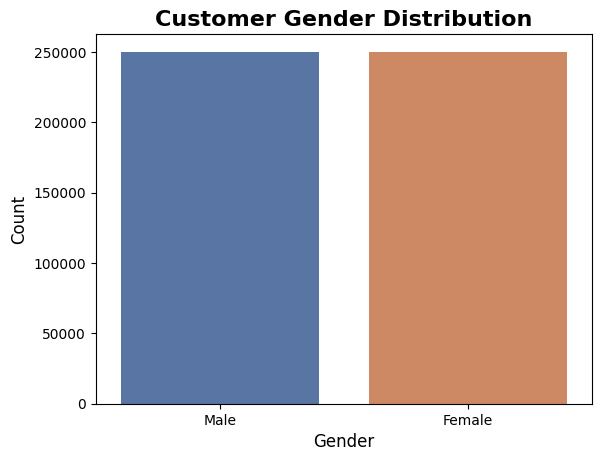

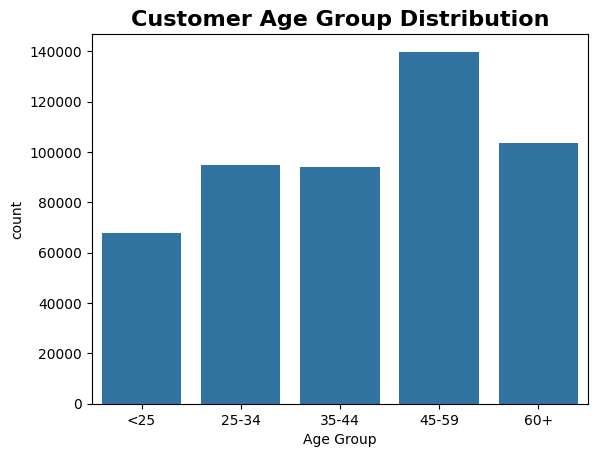

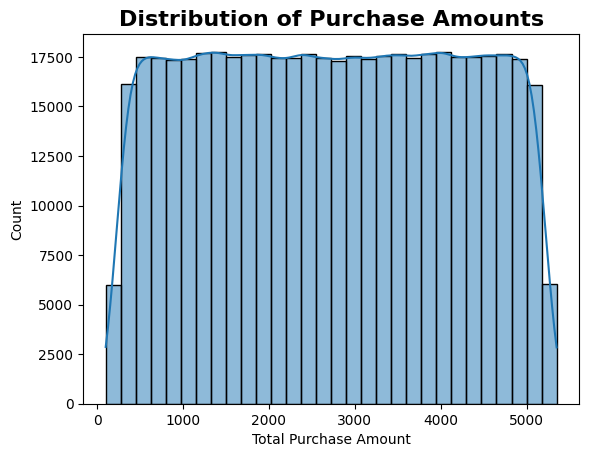

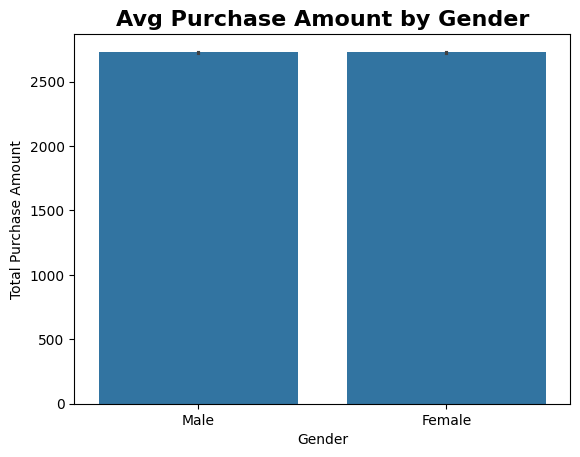

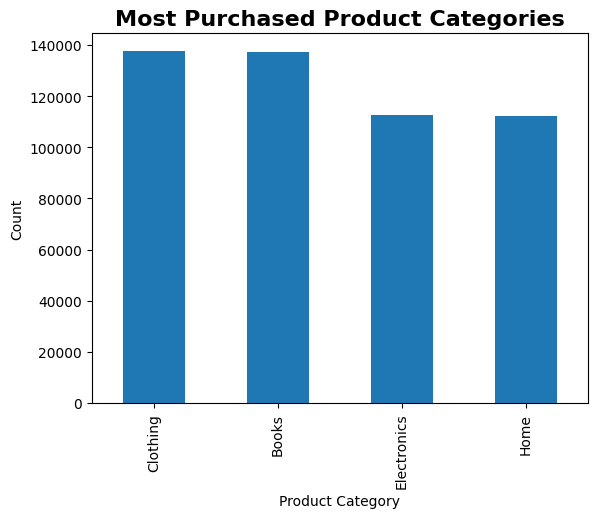

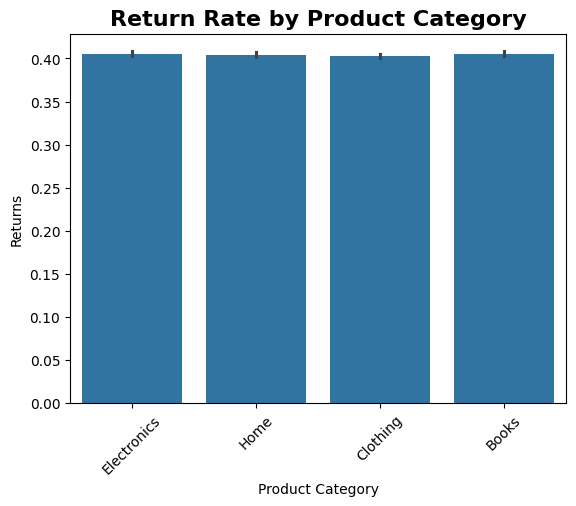

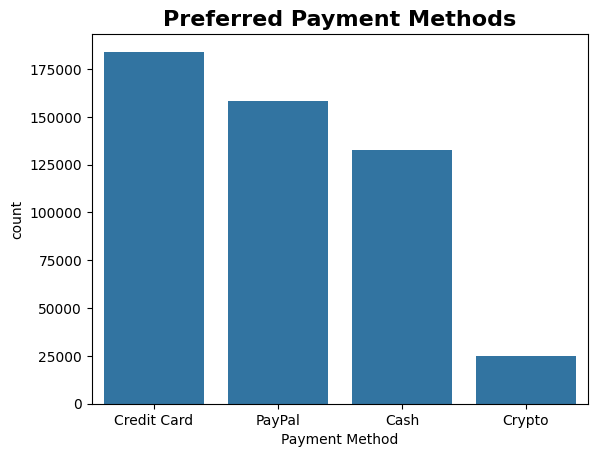

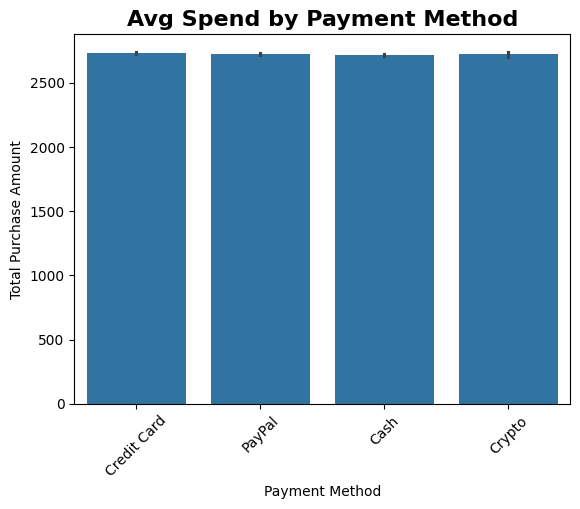

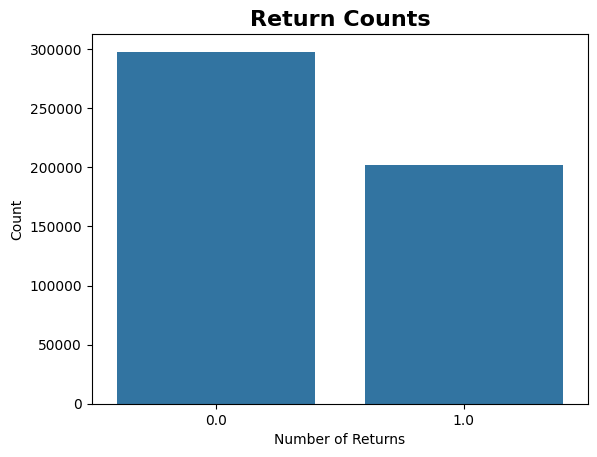

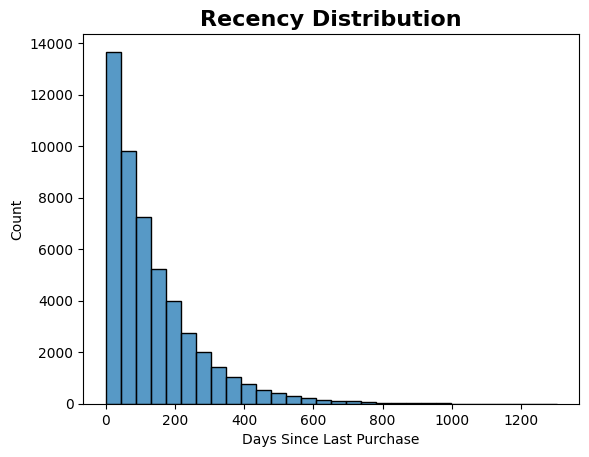

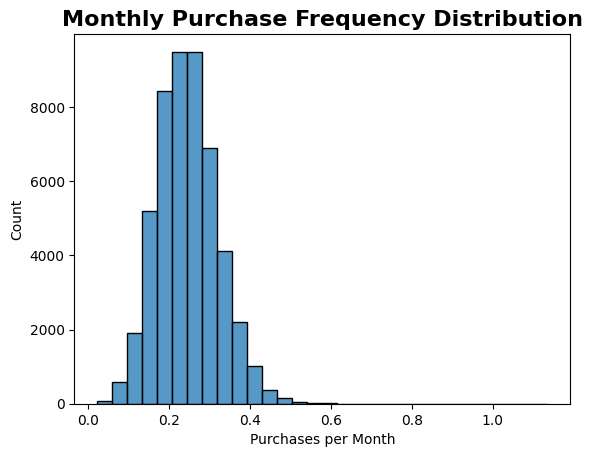

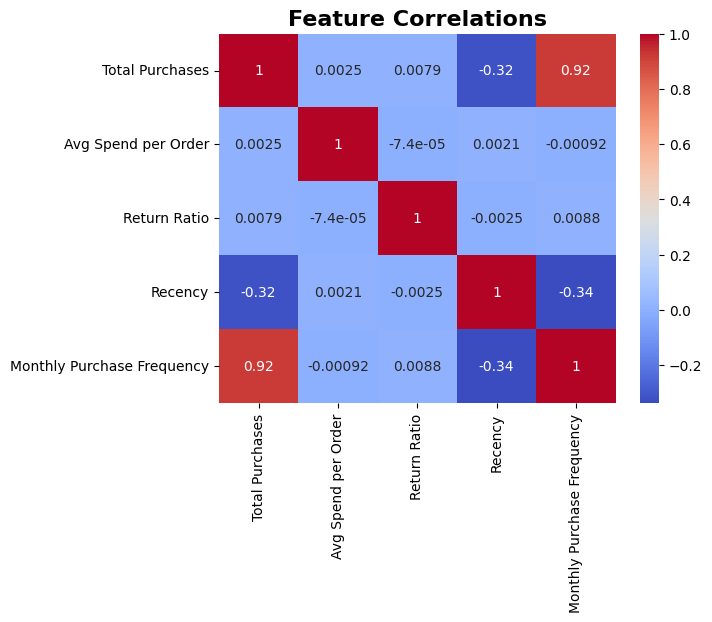

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df1 = pd.read_csv("C:/Users/Pc/Desktop/Python Data Analysis/ecommerce_customer_data_custom_ratios.csv")
df2 = pd.read_csv("C:/Users/Pc/Desktop/Python Data Analysis/ecommerce_customer_data_large.csv")

# Concatenate datasets
df = pd.concat([df1, df2]).reset_index(drop=True)

# Handle missing values
df["Returns"] = df["Returns"].fillna(0)  # assuming null means no returns

# Drop unnecessary columns
df = df.drop(["Age"], axis=1)

# Convert date column to datetime
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])

# Save cleaned dataset
df.to_csv("cleaned_ecommerce_customer_dataset.csv", index=False)

# Feature engineering
total_purchases = df.groupby('Customer ID').size().rename('Total Purchases')
avg_spend = df.groupby('Customer ID')['Total Purchase Amount'].mean().rename('Avg Spend per Order')
total_returns = df.groupby('Customer ID')['Returns'].sum()
return_ratio = (total_returns / total_purchases).rename('Return Ratio')
most_common_category = df.groupby(['Customer ID', 'Product Category']).size().reset_index(name='Count')
most_common_category = most_common_category.sort_values(['Customer ID', 'Count'], ascending=[True, False])
most_common_category = most_common_category.drop_duplicates(subset='Customer ID', keep='first').set_index('Customer ID')['Product Category']


latest_date = df['Purchase Date'].max()
last_purchase = df.groupby('Customer ID')['Purchase Date'].max()
recency = (latest_date - last_purchase).dt.days.rename('Recency')

first_purchase = df.groupby('Customer ID')['Purchase Date'].min()
customer_lifetime_months = ((latest_date - first_purchase).dt.days / 30).clip(lower=1)
monthly_purchase_frequency = (total_purchases / customer_lifetime_months).rename('Monthly Purchase Frequency')

# Combine all features
customer_features = pd.concat([
    total_purchases,
    avg_spend,
    return_ratio,
    most_common_category.rename('Most Common Category'),
    recency,
    monthly_purchase_frequency
], axis=1)
customer_features.index.name = 'Customer ID'
customer_features = customer_features.reset_index()

# Add Age Group
df['Age Group'] = pd.cut(
    df['Customer Age'],
    bins=[0, 25, 35, 45, 60, 100],
    labels=['<25', '25-34', '35-44', '45-59', '60+'],
    right=False
)

# Group by Payment Method (summary stats)
payment_groups = df.groupby('Payment Method')['Total Purchase Amount'].mean()

# --- Exploratory Data Analysis (EDA) ---

# Gender Distribution
gender_colors = {'Male': '#4C72B0', 'Female': '#DD8452'}
sns.countplot(x='Gender', data=df, palette=gender_colors)
plt.title('Customer Gender Distribution',fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Age Group Distribution
sns.countplot(x='Age Group', data=df)
plt.title('Customer Age Group Distribution',fontsize=16, fontweight='bold')
plt.show()

# Total Purchase Amount Distribution
sns.histplot(df['Total Purchase Amount'], bins=30, kde=True)
plt.title('Distribution of Purchase Amounts',fontsize=16, fontweight='bold')
plt.xlabel('Total Purchase Amount')
plt.show()

# Avg Spend by Gender
sns.barplot(x='Gender', y='Total Purchase Amount', data=df)
plt.title('Avg Purchase Amount by Gender',fontsize=16, fontweight='bold')
plt.show()

# Most Common Product Categories
df['Product Category'].value_counts().plot(kind='bar')
plt.title('Most Purchased Product Categories',fontsize=16, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

# Product Category vs. Returns
sns.barplot(x='Product Category', y='Returns', data=df)
plt.title('Return Rate by Product Category',fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

# Payment Method Distribution
sns.countplot(x='Payment Method', data=df)
plt.title('Preferred Payment Methods',fontsize=16, fontweight='bold')
plt.show()

# Avg Spend by Payment Method
sns.barplot(x='Payment Method', y='Total Purchase Amount', data=df)
plt.title('Avg Spend by Payment Method',fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

# Return Counts
sns.countplot(x='Returns', data=df)
plt.title('Return Counts',fontsize=16, fontweight='bold')
plt.xlabel('Number of Returns')
plt.ylabel('Count')
plt.show()

# Recency Distribution
sns.histplot(customer_features['Recency'], bins=30)
plt.title('Recency Distribution',fontsize=16, fontweight='bold')
plt.xlabel('Days Since Last Purchase')
plt.show()

# Monthly Purchase Frequency Distribution
sns.histplot(customer_features['Monthly Purchase Frequency'], bins=30)
plt.title('Monthly Purchase Frequency Distribution',fontsize=16, fontweight='bold')
plt.xlabel('Purchases per Month')
plt.show()

# Correlation Heatmap
sns.heatmap(customer_features.drop(columns=['Customer ID', 'Most Common Category']).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations',fontsize=16, fontweight='bold')
plt.show()
customer_features.to_csv("ecommerce_customer_features.csv", index=False)



In [9]:
print(customer_features.head())


   Customer ID  Total Purchases  Avg Spend per Order  Return Ratio  \
0            1                4          2445.250000      0.250000   
1            2                9          2718.777778      0.555556   
2            3               12          2667.500000      0.250000   
3            4                9          1837.888889      0.444444   
4            5               13          1714.846154      0.538462   

  Most Common Category  Recency  Monthly Purchase Frequency  
0                Books       57                    0.093023  
1          Electronics       73                    0.236842  
2             Clothing       88                    0.269663  
3             Clothing      126                    0.252101  
4                 Home      170                    0.294340  
